In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
    


In [5]:
dataset = [11,10,12,14,12,15,14,13,15,102,12,14,107,108]
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean=np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            
            return outliers


In [6]:
outlier_pt= detect_outliers(dataset)       
outlier_pt

In [7]:
quantile1,quantile3 = np.percentile(dataset,[25,75])
print(quantile1,quantile3)

12.0 15.0


In [8]:
iqr_value=quantile3-quantile1
print(iqr_value)

3.0


In [21]:
quantile1,quantile3 = np.percentile(dataset,[25,75])
print(quantile1,quantile3)

iqr_value=quantile3-quantile1
print(iqr_value)
lower_bound_val = quantile1 -(1.5 * iqr_value)
upper_bound_val = quantile3 +(1.5 * iqr_value)
print(lower_bound_val,upper_bound_val)

12.0 15.0
3.0
7.5 19.5


In [ ]:
#handling missing data(machine learning)

<AxesSubplot:>

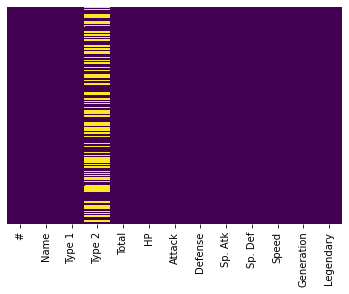

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv('pokemon.csv')
df
df.head()

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Defense', ylabel='count'>

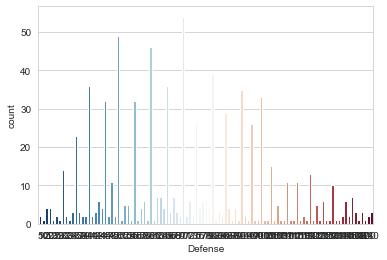

In [44]:
sns.set_style('whitegrid')
sns.countplot(x = 'Defense',data = df,palette ='RdBu_r')


<AxesSubplot:xlabel='Defense', ylabel='count'>

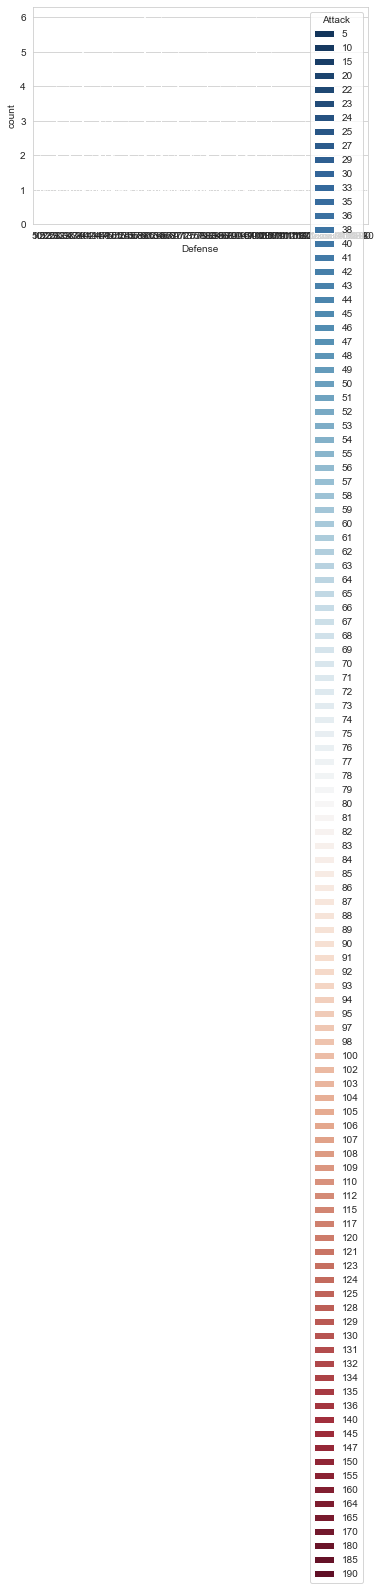

In [58]:
sns.set_style('whitegrid')
sns.countplot(x = 'Defense',hue ='Attack',data = df,palette ='RdBu_r')

In [ ]:
sns.distplot(df['Attack'],dropna(),kde=False,color='darkred',bins=30)

In [ ]:
df['Attack'.hist(bins=30,color='darkred',alpha=0.7)]

<AxesSubplot:xlabel='Defense', ylabel='Attack'>

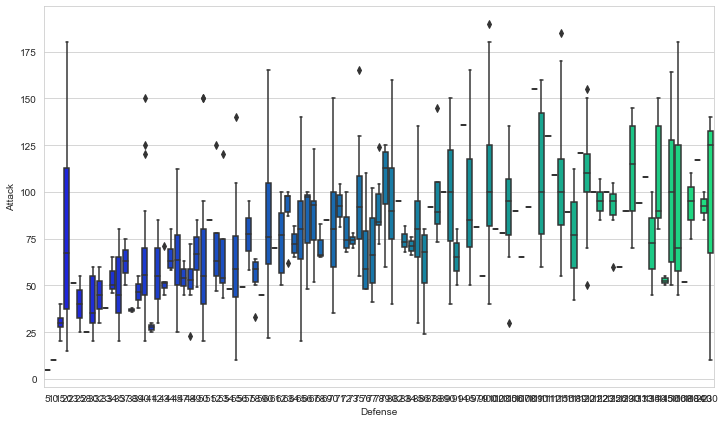

In [63]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Defense',y='Attack',data=df,palette='winter')

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [70]:
df = pd.read_csv('pokemon.csv')
df


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [71]:
df.shape

(800, 13)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [76]:
feature_cols = [col for col in df.columns if col not in ['Defense']]
target_cols = ['Defense']

cat_cols = [col for col in feature_cols if df[col].dtype == 'O']
cont_cols = [col for col in feature_cols if col not in cat_cols]

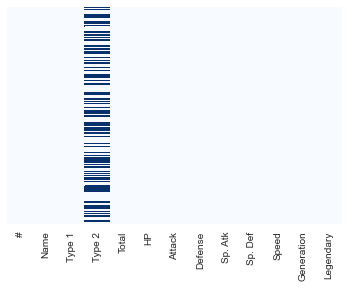

In [77]:
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

In [ ]:
def encode_missing_columns(df, col):
    le = LabelEncoder()
    
    # gets unique values w/o NaN
    unique_without_nan = pd.Series([i for i in df[col].unique() if type(i) == str])
    le.fit(unique_without_nan) # Fit on unique values
    
    # Set transformed col leaving np.NaN as they are
    df[col] = df[col].apply(lambda x: le.transform([x])[0] if type(x) == str else x)

In [78]:
demo_col = pd.Series(['apple', 'mango', 'banana', 'apple', 'banana', np.NaN])
print(f'Unique Values in the Column: {demo_col.unique()}')
print(f'Unique Values of type string: {[i for i in demo_col.unique() if type(i) == str]}')

Unique Values in the Column: ['apple' 'mango' 'banana' nan]
Unique Values of type string: ['apple', 'mango', 'banana']


In [79]:
le = LabelEncoder()
unique_without_nan = pd.Series([i for i in demo_col.unique() if type(i) == str])
le.fit(unique_without_nan)
demo_col.apply(lambda x: le.transform([x])[0] if type(x) == str else x)

0    0.0
1    2.0
2    1.0
3    0.0
4    1.0
5    NaN
dtype: float64

In [82]:
#Dropping Rows with Missing Values
sum(df.isna().sum(axis=1) > 0)

386

In [83]:
 #Dropping Columns with Missing Values
sum(df.isna().sum(axis=0) > 0)

1

In [87]:
#Imputing Continuous Variables
df_simple_imputer = df.copy()

In [88]:
#Imputing Continuous Variables
imputer = SimpleImputer(strategy='mean')

df_simple_imputer[cont_cols] = imputer.fit_transform(df_simple_imputer[cont_cols])

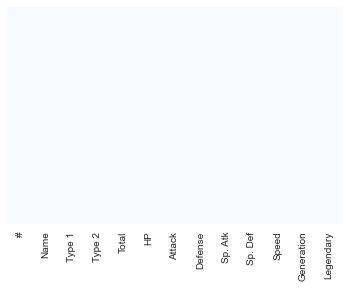

In [89]:
#Imputing Categorical Variables
imputer = SimpleImputer(strategy='most_frequent')

df_simple_imputer[cat_cols] = imputer.fit_transform(df_simple_imputer[cat_cols])
sns.heatmap(df_simple_imputer.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

In [90]:
df_knn_imputer = df.copy()

In [93]:
for col in cat_cols:
    encode_missing_columns(df_knn_imputer, col)

NameError: name 'encode_missing_columns' is not defined

In [94]:
knn_imputer = KNNImputer(n_neighbors=5)

df_knn_imputer[feature_cols] = knn_imputer.fit_transform(df_knn_imputer[feature_cols])

ValueError: could not convert string to float: 'Bulbasaur'

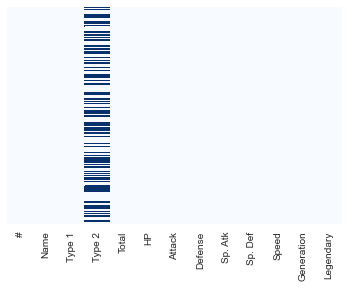

In [92]:
sns.heatmap(df_knn_imputer.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

In [95]:
df_iterative_imputer = df.copy()
for col in cat_cols:
    encode_missing_columns(df_iterative_imputer, col)
itr_imputer = IterativeImputer()

df_iterative_imputer[feature_cols] = itr_imputer.fit_transform(df_iterative_imputer[feature_cols])
sns.heatmap(df_iterative_imputer.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

NameError: name 'encode_missing_columns' is not defined

In [96]:
from sklearn.impute import MissingIndicator
df_miss = df.copy()
miss_indicator = MissingIndicator()

X_miss = miss_indicator.fit_transform(df_miss[feature_cols])
X_miss.shape

(800, 1)

In [97]:
df_miss_itr = df.copy()
for col in cat_cols:
    encode_missing_columns(df_miss_itr, col)
# setting add_indicator=True returns missing indicators alongwith the imputed dataframe
itr_imputer = IterativeImputer(add_indicator=True) 

X = itr_imputer.fit_transform(df_miss_itr[feature_cols])
X.shape

NameError: name 'encode_missing_columns' is not defined